# Lese data fra filer

Programmering med Python er et viktig verktøy når det kommer til å analysere datasett. Dette medfører at vi må være i stand til å lese data fra filer slik at vi kan bruke dataen til å lage grafer eller regne på dataen får å hente ut mer informasjon.

## Hvordan lese data fra en fil?

Det er vanskelig å gi en *helt* generell beskrivelse av hvordan man skal lese inn datafiler. Men typisk vil en datafil lagres på en måte slik at den likner en tabell. Dette betyr at vi har en overskrift for hver kolonne, og at hver rad representerer en ny måling.

Den typiske kodesyntaksen er

```python
with open(filnavn, "r") as infile:
    for linje in infile:
        # Gjør noe med linjen
```

```{admonition} Forklaring av syntaksen

Her er sannsynligvis noen nye ting for deg. La oss gå gjennom dem en etter en.

- `with` åpner en slags kodeblokk som automatisk rydder opp når vi er ferdig med delen. Da slipper vi å åpne og lukke filen manuelt.
- `open` åpner filen.
- `r` indikerer at vi skal *lese* filen. `r` står for *read*.
- `infile` er standardnavn for en fil vi leser fra (det er fra engelsk og er en forkortelse for *input file*).
- `for`-løkka går gjennom alle linjene i fila, slik at vi kan gjøre noe med hver linje.

```

## Eksempler

### Eksempel 1

Tenk deg at vi har en verditabell for funksjonen

$$
f(x) = x^2,
$$

som er gitt ved

| $x$ | $f(x)$ |
|-----|--------|
| 0   | 0      | 
| 1   | 1      |
| 2   | 4      |
| 3   | 9      |
| 4   | 16     |
| 5   | 25     |

Dette er også slik vi ser for oss at en datafil vil se ut. Vi har en overskrift for hver kolonne, og hver rad representerer en måling.


**Du kan laste ned filen med denne koden:** 

In [22]:
import os

url = "https://raw.githubusercontent.com/reneaas/vgs_programmering/main/datasets/IO_data/x_kvadrert.txt"
os.system(" ".join(["curl", url, "-o", "x_kvadrert.txt"]))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    40  100    40    0     0   1261      0 --:--:-- --:--:-- --:--:--  1428


0

Når datafilen er lastet ned, kan vi lese den inn i Python med følgende kode:

In [23]:
x = [] # x-verdier
y = [] # Funksjonsverdiene f(x) = x^2

with open("x_kvadrert.txt", "r") as infile:
    # Vi hopper over første linje fordi det bare er navnet på kolonnene.
    første_linje = infile.readline() 

    # Leser inn resten av filen
    for linje in infile:
        verdier = linje.split()
        x.append(float(verdier[0]))
        y.append(float(verdier[1]))

print(f"{x = }")
print(f"{y = }")

x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
y = [0.0, 1.0, 4.0, 9.0, 16.0, 25.0]


### Eksempel 2

Tenk deg at vi har en datafil med posisjonene til en ball over tid etter at vi har kastet den opp i lufta. Vi har målt posisjonen til kula hvert 0.01 sekund, og vi har lagret dataen i en fil. De første linjene av datafilen ser slik ut:

| $t$ | $x$ | $y$ |
|-----|-----|-----|
| 0.00 | 0.00 | 1.00 |
| 0.01 | 0.05 | 1.15 |
| 0.02 | 0.10 | 1.30 |

Målet vårt er å lese filen og lage en graf av posisjonen til kula. 


**Last ned datafilen med følgende kode:**

In [24]:
import os

url = "https://raw.githubusercontent.com/reneaas/vgs_programmering/main/datasets/IO_data/ball.txt"
os.system(" ".join(["curl", url, "-o", "ball.txt"]))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5289  100  5289    0     0   221k      0 --:--:-- --:--:-- --:--:--  258k


0

Vi kan så lese datafilen med følgende kode:

In [25]:
filnavn = "ball.txt"

t = []
x = []
y = []

with open(filnavn, "r") as infile:
    første_linje = infile.readline()
    for linje in infile:
        verdier = linje.split()
        t.append(float(verdier[0]))
        x.append(float(verdier[1]))
        y.append(float(verdier[2]))

Så kan vi visualisere posisjonen til ballen i $xy$-planet:

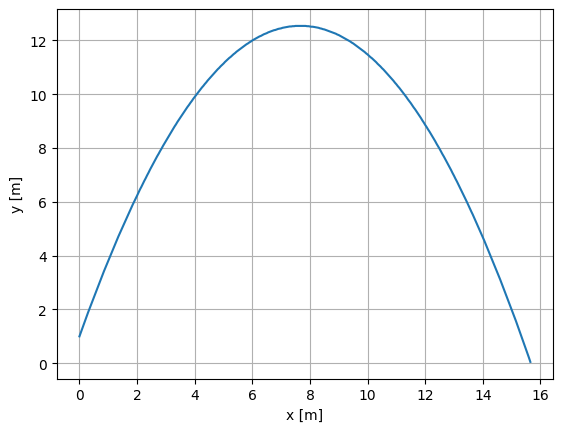

In [26]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.grid(True)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()

````{dropdown} Alternativ måte å lese med Numpy

```python
import numpy as np

data = np.loadtxt(fname="ball.txt", skiprows=1)

t = data[:,0]
x = data[:,1]
y = data[:,2]
```

Koden er kortere enn når vi leser manuelt med Python. I praksis, er `np.loadtxt` en funksjon som ser omtrent slik ut:

```python
def loadtxt(filnavn):
    with open(filnavn, "r") as infile:
        infile.readline() # Hopp over første linje
        data = []
        for linje in infile:
            linje = linje.split()
            linje = [float(element) for element in linje]
            data.append(linje)
            
    return data
```

Det ser frykelig komplisert ut, men det tar essensielt å plasserer verdiene i mindre lister. 

````

## Øvingsoppgaver

### Oppgave 1: $\text{CO}_2$-målinger i atmosfæren


I denne oppgaven skal du visualisere mengden $\text{CO}_2$ i atmosfæren. Vi skal bruke data fra Mauna Loa-observatoriet på Hawaii. Målingene er gjort hver måned siden 1958.

Last ned datafilen med denne koden:



In [ ]:
import os

url = "https://raw.githubusercontent.com/reneaas/vgs_programmering/main/datasets/climate_data/co2_measurements.txt"
os.system(" ".join(["curl", url, "-o", "co2_measurements.txt"]))

Filen har følgende struktur:

1. De to første linjene er bare kommentarer, og kan ignoreres.
2. De resterende linjene har kolonner med følgende informasjon:
    - Kolonne 1: År (1958-2023)
    - Kolonne 2: Måned (1-12)
    - Kolonne 3: År målt i desimaltall (f.eks er 1958.0417 = januar 1958)
    - Kolonne 4: $\text{CO}_2$-mengde i atmosfæren (i ppm)
    - Kolonne 5: *De-seasonalized* $\text{CO}_2$-mengde i atmosfæren (i ppm). Dette handler mest om å trekke fra påvirkninger fra årstidene, og kan ignoreres.
    
De resterende kolonnene er uviktige, så vi kan ignorere deres betydning.

Under ser du et utdrag av datafilen:

In [27]:
os.system("cat co2_measurements.txt | head -n 8")

#            decimal       monthly    de-season  #days  st.dev  unc. of
#             date         average     alized          of days  mon mean
 1958    3   1958.2027      315.70      314.43     -1   -9.99   -0.99
 1958    4   1958.2877      317.45      315.16     -1   -9.99   -0.99
 1958    5   1958.3699      317.51      314.71     -1   -9.99   -0.99
 1958    6   1958.4548      317.24      315.14     -1   -9.99   -0.99
 1958    7   1958.5370      315.86      315.18     -1   -9.99   -0.99
 1958    8   1958.6219      314.93      316.18     -1   -9.99   -0.99


0

**Oppgaven**:

Skriv en pythonkode som leser inn dataen og henter ut følgende:
- Årstallene i en liste `år`
- Månedene i en liste `måned`
- År målt i desimaltall i en liste `år_desimal`
- $\text{CO}_2$-mengden i en liste `co2`

*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`. Du må ha lastet ned filen med koden over for at koden under skal fungere.*

In [ ]:
import matplotlib.pyplot as plt # Importerer plottebiblioteket

filnavn = "co2_measurements.txt"

år = []
måned = []
co2 = []
år_desimal = []

with open(filnavn, "r") as infile:
    infile.readline() # Hopp over første linje
    infile.readline() # Hopp over andre linje

    for linje in infile:
        verdier = NotImplemented

        år.append(NotImplemented) 
        måned.append(NotImplemented)
        år_desimal.append(NotImplemented)
        co2.append(NotImplemented)


# Plotter dataene
plt.plot(år_desimal, co2)
plt.xlabel("År")
plt.ylabel("$CO_2$-mengde [ppm]")
plt.grid(True)
plt.show()

````{dropdown} Løsningsforslag

```python
import matplotlib.pyplot as plt

filnavn = "co2_measurements.txt"

år = []
måned = []
co2 = []
år_desimal = []

with open(filnavn, "r") as infile:
    infile.readline() # Hopp over første linje
    infile.readline() # Hopp over andre linje

    for linje in infile:
        verdier = linje.split()

        år.append(float(verdier[0])) 
        måned.append(float(verdier[1]))
        år_desimal.append(float(verdier[2]))
        co2.append(float(verdier[3]))

# Plotter dataene
plt.plot(år_desimal, co2)
plt.xlabel("År")
plt.ylabel("$CO_2$-mengde [ppm]")
plt.grid(True)
plt.show()
```

```{figure} ./figurer/co2_målinger.png
---
name: co2_data
---
Målinger av $\text{CO}_2$ i atmosfæren ved Mauna Loa-observatoriet på Hawaii. 
```


````

### Oppgave 2: Globale temperaturavvik siden 1880

I denne oppgaven skal vi se på temperaturavvikene på jorda siden 1880. Dataen er hentet fra [NASA](https://climate.nasa.gov/vital-signs/global-temperature/).

Last ned datafilen med denne koden:

In [1]:
import os

url = "https://raw.githubusercontent.com/reneaas/vgs_programmering/main/datasets/climate_change/global_temperatures.txt"

os.system(" ".join(["curl", url, "-o", "global_temperatures.txt"]))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3700  100  3700    0     0  15135      0 --:--:-- --:--:-- --:--:-- 15352


0

De første linjene av datafilen ser slik ut:

In [2]:
os.system("cat global_temperatures.txt | head -n 10")

Land-Ocean Temperature Index (C)
--------------------------------

Year No_Smoothing  Lowess(5)
----------------------------
1880     -0.17     -0.10
1881     -0.09     -0.13
1882     -0.11     -0.17
1883     -0.18     -0.21
1884     -0.29     -0.24


0

Hva betyr disse kolonnene?

- Kolonne 1: År
- Kolonne 2: Temperaturavvik fra gjennomsnittet i perioden 1951-1980 (i grader Celsius)
- Kolonne 3: Temperaturavvik fra gjennomsnittet i perioden 1951-1980 ved *smoothing* (i grader Celsius). Du kan tenke på det som en glattet kurve som passer best med dataen i kolonne 2.


### Oppgave 2a: Les inn og visualiser dataen

Skriv en pythonkode som leser inn dataen inn i lister og henter ut årene og temperaturavvikene (kolonne 2) i lister.

*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`.*

In [5]:
import matplotlib.pyplot as plt

filnavn = "global_temperatures.txt"

år = []
temperaturavvik = []
n_hopp = NotImplemented # Hvor mange linjer skal hoppes over?

with open(filnavn, "r") as infile:
    for _ in range(n_hopp):
        infile.readline()
    
    for linje in infile:
        verdier = NotImplemented

        år.append(NotImplemented)
        temperaturavvik.append(NotImplemented)



plt.plot(år, temperaturavvik)
plt.xlabel("År")
plt.ylabel("Temperaturavvik [°C]")
plt.grid(True)
plt.show()

['1880', '-0.17', '-0.10']


````{dropdown} Løsningsforslag

```python
import matplotlib.pyplot as plt

filnavn = "global_temperatures.txt"

år = []
temperaturavvik = []
temperaturavvik_smooth = []
n_hopp = 5 # Fem tommer linjer.

with open(filnavn, "r") as infile:
    for _ in range(n_hopp):
        infile.readline()
    
    for linje in infile:
        verdier = linje.split()

        år.append(float(verdier[0]))
        temperaturavvik.append(float(verdier[1]))
        temperaturavvik_smooth.append(float(verdier[-1]))
    
# Visualiserer dataene
plt.plot(år, temperaturavvik, color="purple", alpha=0.5, label="Rådata")
plt.plot(år, temperaturavvik_smooth, color="red", label="Glattet kurve")
plt.xlabel("År")
plt.ylabel("Temperaturavvik [°C]")
plt.grid(True)
plt.legend()
plt.savefig("figurer/global_temperaturavvik.pdf")
plt.show()
```


```{figure} ./figurer/global_temperaturavvik.pdf
---
name: global-temperaturavvik
---

Temperaturavvik på jorda siden 1880. Dataen er hentet fra [NASA](https://climate.nasa.gov/vital-signs/global-temperature/).
```

````

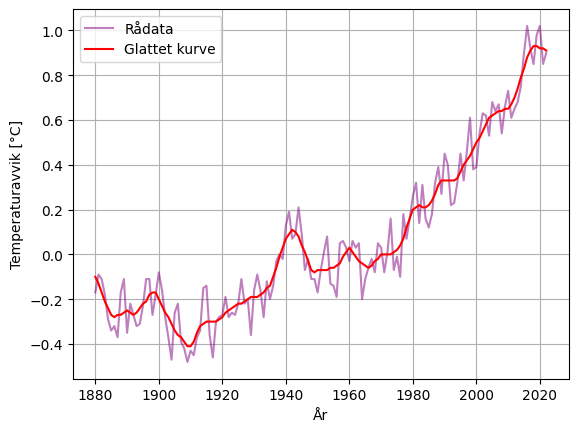

In [29]:
import matplotlib.pyplot as plt

filnavn = "global_temperatures.txt"

år = []
temperaturavvik = []
temperaturavvik_smooth = []
n_hopp = 5 # Fem tommer linjer.

with open(filnavn, "r") as infile:
    for _ in range(n_hopp):
        infile.readline()
    
    for linje in infile:
        verdier = linje.split()

        år.append(float(verdier[0]))
        temperaturavvik.append(float(verdier[1]))
        temperaturavvik_smooth.append(float(verdier[-1]))
    
# Visualiserer dataene
plt.plot(år, temperaturavvik, color="purple", alpha=0.5, label="Rådata")
plt.plot(år, temperaturavvik_smooth, color="red", label="Glattet kurve")
plt.xlabel("År")
plt.ylabel("Temperaturavvik [°C]")
plt.grid(True)
plt.legend()
plt.savefig("figurer/global_temperaturavvik.pdf")
plt.show()

### Oppgave 2b: Finn de varmeste årene

Skriv en pythonkode som finner de fem varmeste årene siden 1880.

*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`.*



````{dropdown} Kodehint 1

Du kan hente ut indeksen til en verdi i en liste ved å bruke `index()`-metoden. For eksempel:

```python
indeks = min_liste.index(5)
```

vil hente ut den *laveste* indeksen som har den verdien i listen `min_liste`. For eksempel, hvis 

```python
min_liste = [1, 5, 3, 5]
```

så vil 

```python
index = min_liste.index(5)
```

sette `index` til `1`, siden det er den *laveste* indeksen som har verdien `5`.

````

````{dropdown} Kodehint 2

Du kan hente ut en høyeste verdien i en liste med `max()`-funksjonen. For eksempel, hvis vi har listen

```python
min_liste = [1, 5, 3, 5]
```

så vil 

```python
max_verdi = max(min_liste)
```

vil sette `max_verdi` til `5` siden det er den største verdien i listen.

````

In [ ]:
max_temperaturavvik = []
max_år = []

while len(max_år) < NotImplemented: # Hvor mange maksverdier skal vi finne?
    max_verdi = NotImplemented # Finn maksverdien
    max_index = NotImplemented # Finn indeksen til maksverdien

    max_temperaturavvik.append(NotImplemented) # Legg til maksverdien i listen
    max_år.append(NotImplemented) # Legg til årstallet i listen

    temperaturavvik.pop(NotImplemented) # Slett elementet fra listen

````{dropdown} Løsningsforslag

```python
max_temperaturavvik = []
max_år = []

while len(max_år) < 5:
    max_index = temperaturavvik.index(max(temperaturavvik))

    max_temperaturavvik.append(temperaturavvik[max_index])
    max_år.append(år[max_index])
    temperaturavvik.pop(max_index)

print(f"{max_år = }")
print(f"{max_temperaturavvik = }")
```

som gir utskriften

```console
max_år = [2016.0, 2019.0, 2018.0, 2016.0, 2015.0]
max_temperaturavvik = [1.02, 1.02, 0.98, 0.92, 0.9]
```
Med andre ord, var årene 2016 og 2019 de varmeste årene noen siden 1880. Da var temperaturen 1.02 °C over gjennomsnittet fra perioden 1951-1980. 

````

In [30]:
max_temperaturavvik = []
max_år = []

while len(max_år) < 5:
    max_index = temperaturavvik.index(max(temperaturavvik))

    max_temperaturavvik.append(temperaturavvik[max_index])
    max_år.append(år[max_index])
    temperaturavvik.pop(max_index)

print(f"{max_år = }")
print(f"{max_temperaturavvik = }")

max_år = [2016.0, 2019.0, 2018.0, 2016.0, 2015.0]
max_temperaturavvik = [1.02, 1.02, 0.98, 0.92, 0.9]


In [ ]:
max_temperaturavvik = []
max_år = []

while len(max_år) < NotImplemented: # Hvor mange maksverdier skal vi finne?
    max_verdi = NotImplemented # Finn maksverdien
    max_index = NotImplemented # Finn indeksen til maksverdien

    max_temperaturavvik.append(NotImplemented) # Legg til maksverdien i listen
    max_år.append(NotImplemented) # Legg til årstallet i listen

    temperaturavvik.pop(NotImplemented) # Slett elementet fra listen

1


min_liste = [1, 5, 3, 5]